In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from numpy.random import multinomial

def sample_series(series, n=10000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [119]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_sampled_series(token, *args, **kwargs):
    
    series = BinCount.token_series(token, *args, **kwargs)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(10,10))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    plt.plot(series)
    plt.show()

fear


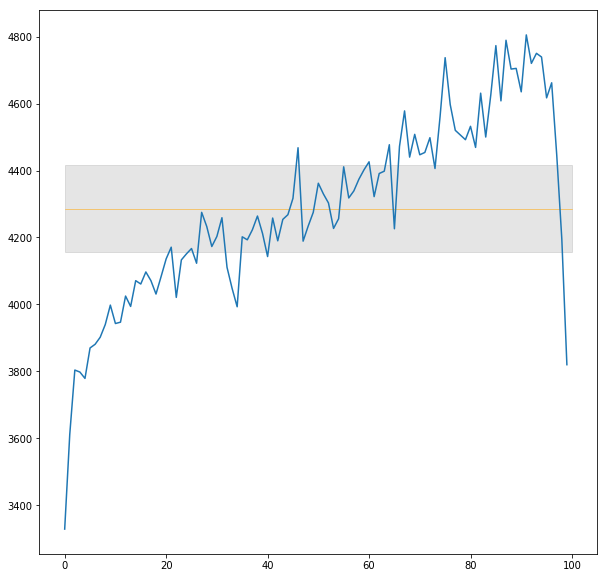

In [142]:
plot_sampled_series('fear')

In [89]:
def bin_zscores(token):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))

    avg_std = samples.std(1).mean()
    
    return np.array([
        (observed-expected) / avg_std
        for observed in series
    ])

In [94]:
bin_zscores('blue')[-1]

3.7863065617431073